<a href="https://colab.research.google.com/github/carolina-garay/AnalisisYCuracion_Grupo32/blob/carolina_Garay_AyC/Garay_ayc_entregable_parte1_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1
Garay Carolina

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
pip install python-decouple

In [34]:
import io
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn as sns
sns.set_context('talk')

from decouple import config
from sqlalchemy import create_engine, text
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [3]:
#Lectura del dataset
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#Visualización de columnas
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
#Visualización de tipos de datos

melb_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



##EJERCICIO1_Respuestas

1.1 Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite


In [6]:
#Luego de realizar una rápida exploración de los datos
#establecemos conexión a la base de dstos
#Aquí el módulo sqlite3 proporciona una interfaz sencilla para interactuar con bases de datos SQLite.
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True) 

1.2 Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.


In [7]:
#Escribe los datos del DataFrame melb_df en una nueva tabla en SQLite
melb_df.to_sql('melb_sql', con=engine, if_exists="replace")

#Lectura del dataset airbnb, damos como 
#parámetros las columnas que queremos extraer
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

#Escribe los datos del DataFrame airbnb en una nueva tabla en SQLite
airbnb_df.to_sql('airbnb_sql', con=engine, if_exists="replace")

2022-05-02 22:38:51,306 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_sql")
2022-05-02 22:38:51,308 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-02 22:38:51,311 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb_sql")
2022-05-02 22:38:51,313 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-02 22:38:51,321 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-02 22:38:51,325 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb_sql (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-02 22:38:51,328 INFO sqlalchemy.engine.Engine [no key 0.00294s] ()
2022-05-02 22:38:51,352 INFO sqlalche

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2022-05-02 22:39:01,129 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-02 22:39:02,389 INFO sqlalchemy.engine.Engine INSERT INTO airbnb_sql ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2022-05-02 22:39:02,397 INFO sqlalchemy.engine.Engine [generated in 1.16416s] ((0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring

In [8]:
#Visualización de columnas de los dataframe airbnb_df y melb_df
print("Columnas de airbnb_df:",airbnb_df.columns)
print("Columnas de melb_df:",melb_df.columns)


Columnas de airbnb_df: Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')
Columnas de melb_df: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [9]:
 #Recuento de filas de los dataframe
 print(len(airbnb_df))
 print(len(melb_df))

22895
13580


3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

In [10]:
# Cantidad de registros totales por ciudad en el dataframe airbnb_df
query1 = "SELECT city, COUNT(city) FROM airbnb_sql GROUP BY city"

# Cantidad de registros totales por ciudad en el dataframe melb_df
query2 = "SELECT CouncilArea, COUNT(CouncilArea) FROM melb_sql GROUP BY CouncilArea"

# Cantidad de registros totales por barrio y ciudad en el dataframe airbnb_df
query3 = "SELECT city, suburb, COUNT(suburb) FROM airbnb_sql GROUP BY suburb ORDER BY city" 

# Cantidad de registros totales por barrio y ciudad en el dataframe melb_df
query4 = "SELECT CouncilArea, Suburb, COUNT(Suburb) FROM melb_sql GROUP BY Suburb ORDER BY CouncilArea"



In [11]:

# creamos lista con las consultas para utilizarla en un for
queries = [query1, query2, query3, query4]



In [12]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-05-02 22:39:03,279 INFO sqlalchemy.engine.Engine SELECT city, COUNT(city) FROM airbnb_sql GROUP BY city
2022-05-02 22:39:03,290 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(city) FROM airbnb_sql GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2022-05-02 22:39:03,392 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(CouncilArea) FROM melb_sql GROUP BY CouncilArea
2022-05-02 22:39:03,397 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT 

1.4 Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [13]:
#Esta línea de código es de Seba
# Por ello, realicé lo señalado en la consigna, pero SI SE EJECUTA EL CODIGO SE CUELGA, YA SEA EN COLAB O EN JUPYTER LOCAL

#query5 = "SELECT * FROM kaggle_sql INNER JOIN airbnb_sql ON kaggle_sql.Postcode = airbnb_sql.zipcode"
#queries = [query5]
#with engine.connect() as con:
 #   for query in queries:
  #    rs = con.execute(query)
   #   print(query)
    #  for row in rs:
     #     print(row)

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

##EJERCICIO2_Respuestas

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

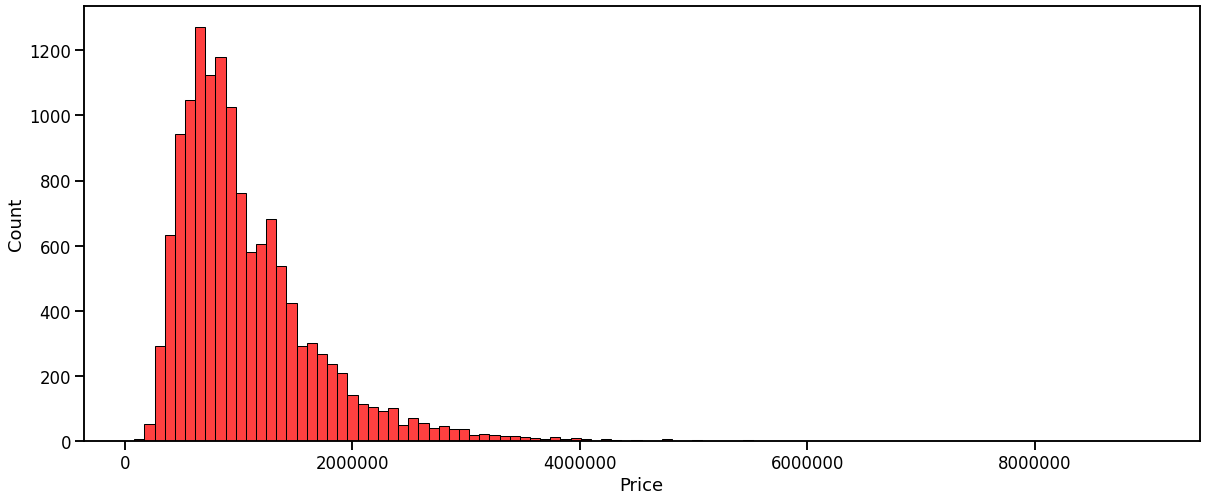

In [19]:
#Exploración de los datos del dataframe melb_df y análisis de las distribuciones de sus variables
plt.figure(figsize=(20,8))
sns.histplot(melb_df.Price.dropna(), bins=100, color ='red')
plt.ticklabel_format(style='plain');

#g.refline(x=df_orig[s_neto].min(), color='green', linestyle='--', label="Min = 1 $ARS")
#g.refline(x=df_orig[s_neto].max(), color='red', linestyle='--', label="Max = 2.080.000 $ARS")

In [38]:
precio='Price'

In [39]:
# Cálculo de medidas de tendencia central
media_price = melb_df[precio].mean()
mediana_price = melb_df.Price.median() 
moda_price = melb_df.Price.mode()
print("Media:",media_price)
print("Mediana:", mediana_price)
print("Moda:", moda_price)

#Cálculo de valores máximos y mínimos
max_price = melb_df.Price.max()
min_price = melb_df.Price.min()
print("Precio máximo:",max_price)
print("Precio mínimo:", min_price)

Media: 1075684.079455081
Mediana: 903000.0
Moda: 0    1100000.0
dtype: float64
Precio máximo: 9000000.0
Precio mínimo: 85000.0


In [36]:
# Cálculo de frecuencias para diferentes salarios y rangos de salario
salary_list = [80000, 100000, 200000]
salaries_list = [60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
for s in salary_list:
  print(f"Cantidad de personas con salarios igual a {str(s)} $ARS: ",len(df_orig[df_orig[s_neto]==float(s)]))
for i in range (len(salaries_list) - 1):
  print(f"Cantidad de personas con salarios entre {str(salaries_list[i])} y {str(salaries_list[i+1])} $ARS:", len(df_orig[(df_orig[s_neto] > float(salaries_list[i])) & (df_orig[s_neto] <= float(salaries_list[i+1]))]))

In [74]:

# Cálculo de frecuencias para diferentes precios
salary_list = [85000, 100000, 200000,3000000,4000000,5000000,6000000,9000000]
salaries_list = [84000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000,2000000,2600000,3000000,4000000,5000000,6000000,9000000]
for s in salary_list:
  print(f"Cantidad de casas con precios igual a {str(s)} dólares: ",len(melb_df[melb_df[precio]==float(s)]))
for i in range(len(salaries_list) - 1):
   print(f"Cantidad de casas con precios entre {str(salaries_list[i])} y {str(salaries_list[i+1])} dólares:", len(melb_df[(melb_df[precio] > float(salaries_list[i])) & (melb_df[precio] <= float(salaries_list[i+1]))]))

Cantidad de casas con precios igual a 85000 dólares:  1
Cantidad de casas con precios igual a 100000 dólares:  0
Cantidad de casas con precios igual a 200000 dólares:  2
Cantidad de casas con precios igual a 3000000 dólares:  11
Cantidad de casas con precios igual a 4000000 dólares:  8
Cantidad de casas con precios igual a 5000000 dólares:  0
Cantidad de casas con precios igual a 6000000 dólares:  0
Cantidad de casas con precios igual a 9000000 dólares:  1
Cantidad de casas con precios entre 84000 y 90000 dólares: 1
Cantidad de casas con precios entre 90000 y 100000 dólares: 0
Cantidad de casas con precios entre 100000 y 200000 dólares: 11
Cantidad de casas con precios entre 200000 y 300000 dólares: 139
Cantidad de casas con precios entre 300000 y 400000 dólares: 509
Cantidad de casas con precios entre 400000 y 500000 dólares: 937
Cantidad de casas con precios entre 500000 y 600000 dólares: 1165
Cantidad de casas con precios entre 600000 y 700000 dólares: 1399
Cantidad de casas con pre

In [69]:
# Filtrado de la base de datos original y generación de la nueva base de datos (df_new)
#Elijo datos con una frecuencia mayor
melb_new=  melb_df[(melb_df[precio] > 200000) & (melb_df[precio] < 3000000)]

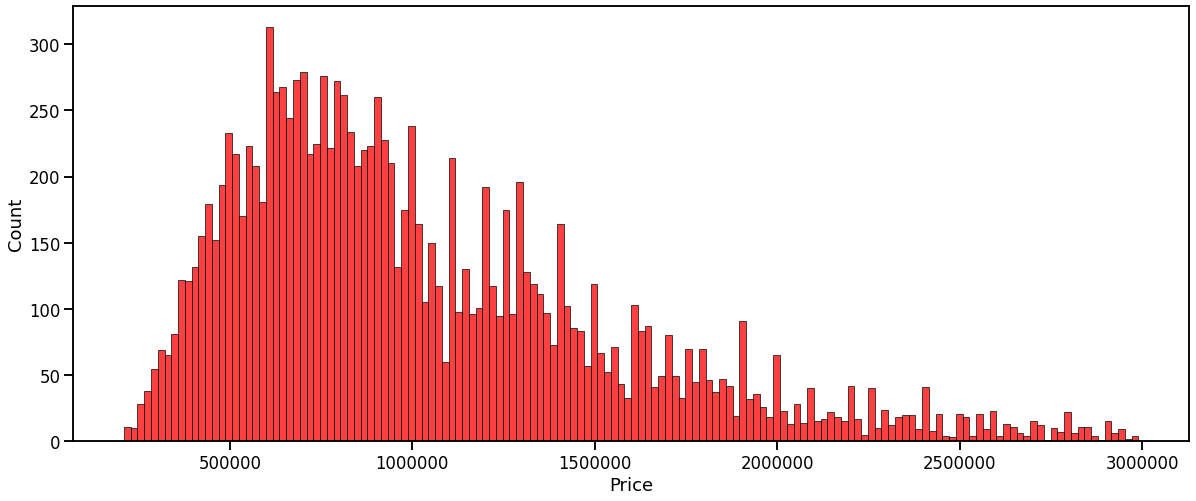

In [72]:
plt.figure(figsize=(20,8))
sns.histplot(melb_new.Price.dropna(), bins=150, color ='red')
plt.ticklabel_format(style='plain');

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)